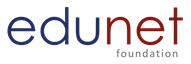

# Edunet Foundation : Class Room Exercises 

## Lab 31: Classification of Images from the CIFAR-10 Dataset using ANN (MLP) & CNN

### Objective: 
The objective of the "Classification of Images from the CIFAR-10 Dataset using ANN (MLP) & CNN" lab is to equip learners with the knowledge and skills to build and evaluate image classification models using Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN). The course begins with fundamental concepts of neural networks and image data representation. It advances to implementing Multilayer Perceptrons (MLP) and CNNs using Python libraries such as TensorFlow and Keras. Learners will gain hands-on experience in preprocessing image data, designing network architectures, and training models to classify images into ten different categories from the CIFAR-10 dataset. By the end of the lab, learners will be proficient in applying ANN and CNN techniques to image classification tasks, enabling them to tackle similar problems in real-world applications.

# Classification of Images from the CIFAR-10 Dataset using  ANN (MLP) & CNN.
The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

Class labels are:

airplane : 0, automobile : 1, bird : 2, cat : 3, deer : 4, dog : 5, frog : 6, horse : 7, ship : 8, truck : 9.

### Import Tensorflow

In [ ]:
#!pip install matplotlib

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.__version__

'3.9.3'

In [ ]:
tf.__version__

# Check for GPU

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


# Load Dataset

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 37s 0us/step


## Show some sample images of data set with corresponding labels.


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


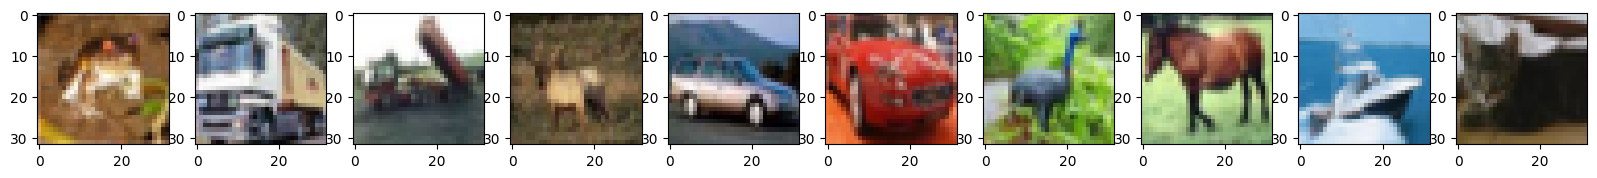

In [5]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset
Normalize the input data

In [8]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

# MLP Network

* I/p Layer - Flatten
* Hidden layer - 2048, AF = 'RELU'
* O/p Layer - 10 , AF-Softmax

In [7]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [9]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))#input layer
ann.add(Dense(2048,activation='relu'))#Hidden layer
ann.add(Dense(10,activation='softmax'))#Output layer

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [13]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = ann.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9096 - accuracy: 0.3275 - val_loss: 1.7292 - val_accuracy: 0.3786
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6892 - accuracy: 0.3962 - val_loss: 1.6275 - val_accuracy: 0.4174
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6131 - accuracy: 0.4249 - val_loss: 1.5937 - val_accuracy: 0.4245
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5690 - accuracy: 0.4425 - val_loss: 1.5676 - val_accuracy: 0.4405
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5315 - accuracy: 0.4555 - val_loss: 1.5457 - val_accuracy: 0.4480
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5063 - accuracy: 0.4645 - val_loss: 1.5392 - val_accuracy: 0.4526
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4884 - accuracy: 0.4699 - val_loss: 1.5256 - val_accuracy:

#### With the below simple function we will be able to plot our training history.

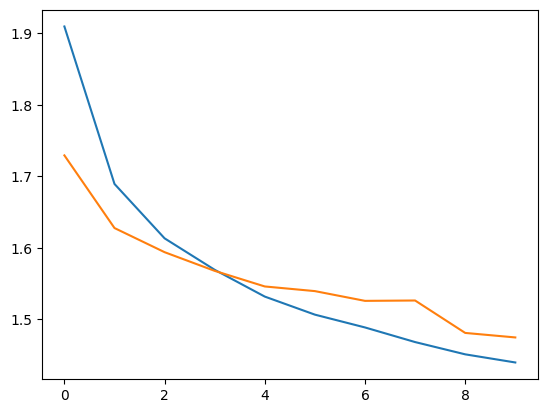

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [16]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [18]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [19]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 128)       

In [20]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 41s 13ms/step - loss: 1.6497 - accuracy: 0.3913 - val_loss: 1.2383 - val_accuracy: 0.5485
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2206 - accuracy: 0.5674 - val_loss: 1.0199 - val_accuracy: 0.6481
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9887 - accuracy: 0.6556 - val_loss: 0.9310 - val_accuracy: 0.6831
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8425 - accuracy: 0.7104 - val_loss: 0.8609 - val_accuracy: 0.7110
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7355 - accuracy: 0.7477 - val_loss: 0.7872 - val_accuracy: 0.7355
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6461 - accuracy: 0.7770 - val_loss: 0.7943 - val_accuracy: 0.7394
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5638 - accuracy: 0.8061 - val_loss: 0.7805 -

In [21]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

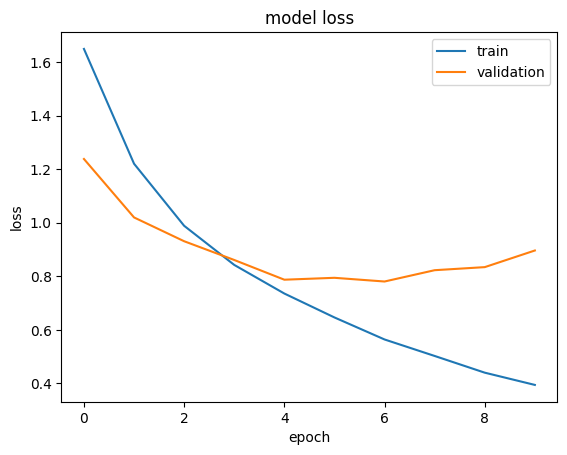

In [22]:
plotLosses(history)

In [23]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

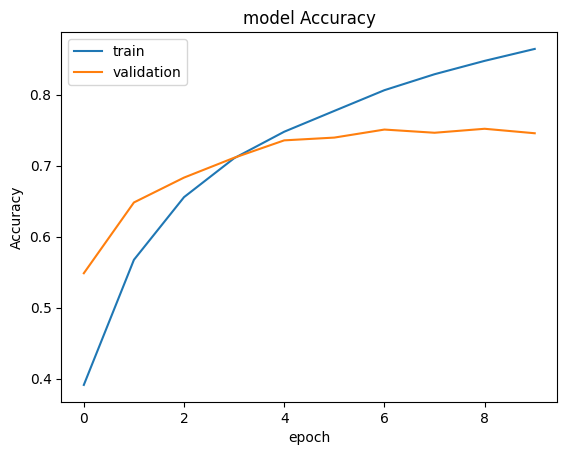

In [24]:
plotAccuracy(history)

In [29]:
from keras.models import load_model
cnn.save('model111.h5')

In [26]:
# Load the model
model = tf.keras.models.load_model('model111.h5')

In [27]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 [==============================] - 0s 453ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

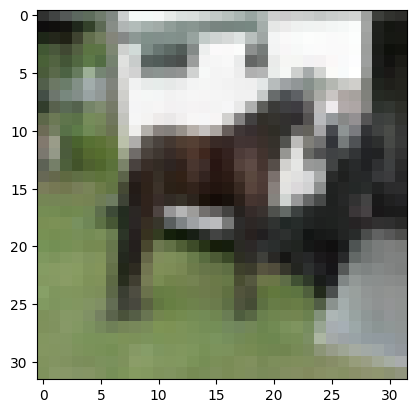

In [28]:
plt.imshow(x_test[20])

In [30]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 [==============================] - 0s 30ms/step
The predicted class is: horse


# Happy Learning 